# Análisis de componentes principales

## Objetivos de la sesión
En esta sección aprenderemos a reducir las dimensiones de nuestros datos utilizando una técnica llamada PCA. Aprenderemos la teoría detrás de esta técnica y cómo implementarla en Python.

## Introducción
PCA es una técnica de reducción de la dimensionalidad que se utiliza para transformar nuestros datos. ¿Qué nos motiva a reducir las dimensiones de nuestros datos?

Es posible que queramos acelerar el rendimiento de nuestro modelo proporcionándole menos variables
Podemos tener muchas columnas de datos muy escasos. Al usar PCA, tenemos menos columnas con menos dispersión. Esto puede mejorar el rendimiento de nuestro modelo
La creación de menos variables en función de nuestros datos originales nos permite alcanzar estos objetivos.

## Introducción a las dimensiones

### Gráficos unidimensionales
Digamos que tenemos algunos datos unidimensionales. DIbujarlo podría darnos información útil. Por ejemplo, el siguiente gráfico nos muestra datos distribuidos uniformemente

![](https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/images/oned-uniform.png)

Por otro lado, también podemos utilizar gráficos unidimensionales para mostrar datos que no son uniformes.

![](https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/images/oned-multi-mode.png)

### Gráficos bidimensionales
Al añadir una segunda característica a nuestros datos, podemos representarlos en un espacio bidimensional.

![](https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/images/twod-plot.png)

### Gráficos tridimensionales
También podríamos ir más lejos y representar nuestros datos en tres dimensiones. Sin embargo, aquí es donde se detienen las visualizaciones posibles.

![](https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/images/threed-scatter.png)

Sin embargo, en realidad, nuestros datos tienen más de tres dimensiones.

## Aplanamiento de los datos
De nuevo a 2-D
Supongamos que tenemos el siguiente conjunto de datos bidimensionales.

![](https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/images/majority-of-variation.png)

Si aplanásemos los datos, no se vería muy diferente.

![](https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/images/flattened-2d.png)

En este caso, podemos mover los datos de dos a una dimensión sin mucha pérdida de información. Esta nueva visualización todavía transmite la información de la mayor parte de la variación de los datos en el eje x.

![](https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/images/reduce-to-1d.png)

## Reducción de dimensiones
En la vida real, reducimos las dimensiones de las cosas con bastante frecuencia mientras mantenemos la mayor parte de la información importante. Por ejemplo, podemos ver la televisión y seguir entendiendo las imágenes a pesar de que han sido reducidas de 3 dimensiones a 2 dimensiones. El PCA tiene la intención de reducir los datos de tal manera que todavía retenemos una gran cantidad de información sobre ellos. A continuación se muestra un ejemplo de cómo se ve la variación en los datos bidimensionales.

![](https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/images/2d-variation.png)

## Cambio de los ejes
Imagina que rotamos los ejes. Ahora la variación actúa como nuestros nuevos ejes x e y. Después de la rotación, es fácil ver las direcciones de variación en los datos.

![](https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/images/rotate-axes.png)

Estos dos nuevos ejes se denominan componentes principales de los datos. El primer componente (en azul) abarca la mayor parte de la varianza, mientras que el segundo componente (en verde) abarca la segunda mayor parte de la varianza.

![](https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/images/principal-axes.png)

Podemos utilizar esta metodología con más dimensiones y clasificar más de dos componentes.

[Video Explicación Intuitiva](https://www.youtube.com/watch?v=BfTMmoDFXyE)

## PCA en Python
Encontraremos los componentes principales de los datos utilizando la función PCA de statsmodels. En este ejemplo, utilizaremos un [conjunto de datos](https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/module-2/breast-cancer.csv) sobre el cáncer de mama del repositorio de datos de la UCI. Estos datos contienen 35 columnas, mantendremos 31 columnas numéricas y buscaremos los dos componentes principales para nuestros datos.

In [105]:
import pandas as pd

In [106]:
total_cols = ['id', 'outcome', 'time', 'cell_1_radius', 'cell_1_texture', 'cell_1_perimiter',
              'cell_1_area', 'cell_1_smoothness', 'cell_1_compactness', 'cell_1_concavity',
              'cell_1_concave_points', 'cell_1_symmetry', 'cell_1_fractal_dimension',
              'cell_2_radius', 'cell_2_texture', 'cell_2_perimiter', 'cell_2_area',
              'cell_2_smoothness', 'cell_2_compactness', 'cell_2_concavity',
              'cell_2_concave_points', 'cell_2_symmetry', 'cell_2_fractal_dimension', 'cell_3_radius', 
              'cell_3_texture', 'cell_3_perimiter', 'cell_3_area', 'cell_3_smoothness',
              'cell_3_compactness', 'cell_3_concavity', 'cell_3_concave_points', 'cell_3_symmetry',
              'cell_3_fractal_dimension', 'tumor_size', 'lymph_status']
breast_cancer = pd.read_csv('./data/breast-cancer.csv', names=total_cols)
breast_cancer.head()

,id,outcome,time,cell_1_radius,cell_1_texture,cell_1_perimiter,cell_1_area,cell_1_smoothness,cell_1_compactness,cell_1_concavity,...,cell_3_perimiter,cell_3_area,cell_3_smoothness,cell_3_compactness,cell_3_concavity,cell_3_concave_points,cell_3_symmetry,cell_3_fractal_dimension,tumor_size,lymph_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


Ahora extraeremos sólo las columnas numéricas y encontraremos los componentes principales usando la función PCA. Para este ejemplo, nos limitaremos a sólo 2 componentes.

In [108]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
numeric_columns = [x for x in total_cols if x not in ['id', 'outcome', 'time', 'lymph_status']]
breast_cancer_numeric = breast_cancer[numeric_columns]
pca = PCA(n_components=2)
two_dim = pca.fit_transform(breast_cancer_numeric.iloc[:,0:30])
print(pca.explained_variance_ratio_)  

[0.96499523 0.03299305]


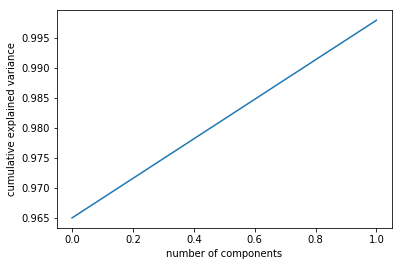

In [127]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

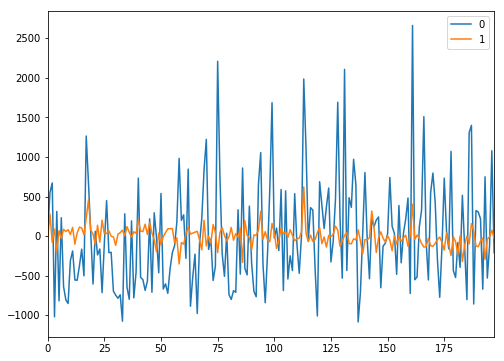

In [128]:
components = pd.DataFrame(two_dim)
components.plot(figsize=(8,6));

In [129]:
components["outcome"] = breast_cancer["outcome"]
components.columns = ["PCA1", "PCA2", "target"]

In [130]:
components.head()

,PCA1,PCA2,target
0,48.323181,-21.787707,N
1,552.887143,280.321912,N
2,672.696218,-78.581007,N
3,-1019.263188,89.149119,N
4,312.000897,-198.839172,R


In [131]:
grouped_components = components.groupby('target')

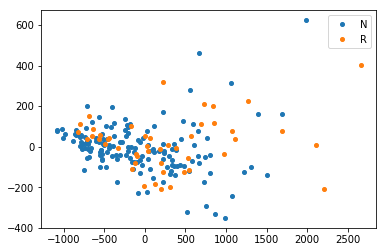

In [136]:
fig, ax = plt.subplots()
for name, group in grouped_components:
    ax.plot(group.PCA1, group.PCA2, marker='o', linestyle='', ms=4, label=name)
ax.legend()

plt.show()

## Conclusión
En esta lección aprendimos acerca de la lógica del PCA. Aprendimos que el PCA se utiliza principalmente para tratar datos con un gran número de características. PCA nos ayuda a mejorar la velocidad y a veces la precisión de nuestros algoritmos ML. El objetivo principal del PCA es reducir las dimensiones de los datos y, al mismo tiempo, preservar la variabilidad de los mismos.